<a href="https://colab.research.google.com/github/Rodrigoradzinski/TrabalhosColab/blob/main/Seguran%C3%A7a%20da%20Informa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alunos:
---
       Cleyton Rodrigo 9 Pº
       Douglas Mariano Santa Rosa - 5° Periodo

# **Aula 9 – Introdução a Segurança da Informação**
---
Entre várias coisas, a segurança da informação serve para manter os ativos de
uma empresa seguros contra possíveis atacantes e demais vulnerabilidades. Para isso,
essa empresa precisa conhecer as falhas, para que possa trabalhar em cima delas de
forma proativa.

*   A segurança da informação se baseia então em 3 pilares:
 Confidencialidade: manter as informações confidenciais entre somente quem deve
saber dela (lembram da aula de criptografia?)
*   Disponibilidade: manter as informações e sistemas acessíveis para quando alguém
quiser acessar
* Integridade: manter as informações integras, ou seja, que não foram alteradas por
terceiros.


---

A falha em qualquer um desses pilares cria uma brecha de segurança e pode se
tornar um incidente, que podem ser divididos em:


*   Humanos: causados por pessoas, de forma intencional ou não
*   Hardware: falhas de hardware
*   Software: falhas de software



---

A seguir vamos explorar algumas algumas análises que podem ser feitas para
evitar que se tornem incidentes


# **ETAPA1**
- Verificação de links de sites

---



> Muitas vezes os sistemas ou sites vão sendo atualizados e ficam páginas obsoletas no ar,
que por chamarem funções antigas ou por terem sido esquecidas e ficarem sem
atualizações podem ser uma porta de entrada para possíveis hackers. Vamos então listar
todas as páginas de um site, separando os links por:
 Links externos: levam a outras páginas da internet
 Links internos: mostram os links que levam a páginas dentro daquele domínio


- Começamos fazendo a instalação de nossas bibliotecas e fazendo seu carregamento

In [1]:
!pip3 install requests bs4 colorama


In [4]:
import requests
from urllib.parse import urlparse, urljoin
from bs4 import BeautifulSoup
import colorama


- Vamos mostrar os links em cores diferentes, assim fica mais fácil visualizar

In [5]:
colorama.init()
GREEN = colorama.Fore.GREEN
GRAY = colorama.Fore.LIGHTBLACK_EX
RESET = colorama.Fore.RESET
YELLOW = colorama.Fore.YELLOW

- Vamos separa os links em internos e externos


In [6]:
internal_urls = set()
external_urls = set()

- Fazemos uma função para checar se uma URL é válida ou não

In [7]:
def is_valid(url):
  parsed = urlparse(url)
  return bool(parsed.netloc) and bool(parsed.scheme)


- Fazemos a função para checar as urls

In [8]:
def get_all_website_links(url):
# todas as urls do site
  urls = set()
  # nome do domínio sem o protocolo (http por exemplo)
  domain_name = urlparse(url).netloc
  soup = BeautifulSoup(requests.get(url).content, "html.parser")
  for a_tag in soup.findAll("a"):
    href = a_tag.attrs.get("href")
    if href == "" or href is None:
    # href está sem link
     continue
    # junta a url se está estiver sem link
    href = urljoin(url, href)
    parsed_href = urlparse(href)
    # remove parâmetros do link, se tiver.
    href = parsed_href.scheme + "://" + parsed_href.netloc + parsed_href.path
    if not is_valid(href):
    # url inválida
      continue
    if href in internal_urls:
    # já setado
      continue
    if domain_name not in href:
    # link externo
      if href not in external_urls:
        print(f"{GRAY}[!] External link: {href}{RESET}")
      external_urls.add(href)
      continue
    print(f"{GREEN}[*] Internal link: {href}{RESET}")
    urls.add(href)
    internal_urls.add(href)
  return urls

- Cria função para extrair todos os links de uma página

In [9]:
total_urls_visited = 0


In [10]:
def crawl(url, max_urls=30):
  """
  Rastreia uma página da web e extrai todos os links.
  Você encontrará todos os links nas variáveis de conjunto global `external_urls` e
  `internal_urls`.
  parâmetros:
  max_urls (int): número máximo de URLs para rastrear, o padrão é 30.
  """
  global total_urls_visited
  total_urls_visited += 1
  print(f"{YELLOW}[*] Crawling: {url}{RESET}")
  links = get_all_website_links(url)
  for link in links:
    if total_urls_visited > max_urls:
       break
    crawl(link, max_urls=max_urls)

- Faz a execução de todas as funções que criamos anteriormente

In [14]:
if __name__ == "__main__":
  crawl("https://www.systemglass.com.br/")
  print("[+] Total Internal links:", len(internal_urls))
  print("[+] Total External links:", len(external_urls))
  print("[+] Total URLs:", len(external_urls) + len(internal_urls))


[*] Crawling: https://www.systemglass.com.br/
[*] Internal link: https://www.systemglass.com.br/services
[*] Internal link: https://www.systemglass.com.br/contact
[*] Crawling: https://www.systemglass.com.br/services
[!] External link: https://systemglass.com.br/contact
[*] Crawling: https://www.systemglass.com.br/contact
[!] External link: https://web.whatsapp.com/send
[+] Total Internal links: 7
[+] Total External links: 2
[+] Total URLs: 9


1) Faça a extração dos links de algum site da sua escolha, verifique se você encontra
algum link ‘quebrado’ ou ‘estranho’

R:

```
[*] Crawling: https://www.systemglass.com.br/
[*] Internal link: https://www.systemglass.com.br/services
[*] Internal link: https://www.systemglass.com.br/contact
[*] Crawling: https://www.systemglass.com.br/services
[!] External link: https://systemglass.com.br/contact
[*] Crawling: https://www.systemglass.com.br/contact
[!] External link: https://web.whatsapp.com/send
[+] Total Internal links: 7
[+] Total External links: 2
[+] Total URLs: 9
```



# **ETAPA2**
- Verificação de portas abertas

---



> Muitos servidores ao fazer sua instalação deixam algumas portas abertas por padrão, e
nem sempre todas elas são usadas. Essas portas são usadas para se comunicar com
outros serviços, e por isso precisam ficar abertas, mas se alguma ficar sem motivo ou
sem estar sendo usada, pode ser um alvo de ataques.
- Vamos começar novamente fazendo a instalação e carregamento das bibliotecas
utilizadas




Vamos configurar para cada porta ficar com uma cor **diferente**

In [2]:
!pip3 install colorama



In [1]:
import socket  # usado para conexão
from colorama import init, Fore
init()

# Definição das cores
GREEN = Fore.GREEN
RESET = Fore.RESET
GRAY = Fore.LIGHTBLACK_EX

Criamos a função para verificar quais portas estão abertas, isso é feito mandando um
ping para a porta, se ela responder é porque está aberta. Um ping é como se fosse uma
‘campainha’ para o servidor, dizendo que alguém quer acessar aquela porta, ou seja, ver
se alguém ‘atende’ a campainha


In [2]:
import socket

def is_port_open(host, port):
    """
    Determine se o `host` tem a `porta` aberta.
    """
    # cria uma nova conexão
    s = socket.socket()
    s.settimeout(0.2)
    try:
        # tenta se conectar ao host usando essa porta
        s.connect((host, port))
        # altere o tempo limite se quiser um pouco mais rápido (menos precisão)

    except:
        # não é possível conectar, a porta está fechada
        return False
    else:
        # a conexão foi estabelecida, a porta está aberta!
        return True

- Aqui pedimos ao usuário para inserir o site que quer checar as portas e fazemos a
chamada das funções criadas anteriormente

In [3]:
host = input("Insira seu site: api.systemglass.com.br ")
host =  'api.systemglass.com.br '# 167.71.102.58
# Iterar nas portas, de 1 a 1024#
for port in range(8180, 8190):
    print(f"Verificando {host} na porta {port}...")  # Mostra qual porta está sendo verificada
    if is_port_open(host, port):
        print(f"{GREEN}[+] {host}:{port} is open{RESET}")
    else:
        print(f"{GRAY}[!] {host}:{port} is closed{RESET}")

Insira seu site: api.systemglass.com.br 167.71.102.58
Verificando api.systemglass.com.br na porta 8180...
[!] api.systemglass.com.br:8180 is closed
Verificando api.systemglass.com.br na porta 8181...
[!] api.systemglass.com.br:8181 is closed
Verificando api.systemglass.com.br na porta 8182...
[!] api.systemglass.com.br:8182 is closed
Verificando api.systemglass.com.br na porta 8183...
[!] api.systemglass.com.br:8183 is closed
Verificando api.systemglass.com.br na porta 8184...
[!] api.systemglass.com.br:8184 is closed
Verificando api.systemglass.com.br na porta 8185...
[!] api.systemglass.com.br:8185 is closed
Verificando api.systemglass.com.br na porta 8186...
[!] api.systemglass.com.br:8186 is closed
Verificando api.systemglass.com.br na porta 8187...
[!] api.systemglass.com.br:8187 is closed
Verificando api.systemglass.com.br na porta 8188...
[!] api.systemglass.com.br:8188 is closed
Verificando api.systemglass.com.br na porta 8189...
[!] api.systemglass.com.br:8189 is closed


2) Das portas abertas que você encontrou, para que serve cada uma delas? (pesquise…).


*   Item da lista
*   Item da lista




E que tipos de ataques podem ser feitos a partir de portas de servidor abertas?


 R:










# **ETAPA3**
- Verificação de subdominios

---



> Tal quanto páginas antigas e portas do servidor abertas, podemos verificar os
subdominios que um site tem e ver se algum está com conteúdos antigo ou não devia
mais estar listado, ou procurar por específicos como cpanel.site.com.br, entre outros, pois
são nomes que são mais visados em possíveis ataques.
Repositórios do governo geralmente ficam esquecidos com material aberto e disponível
para consulta.


- Começamos fazendo importação e instalação dos pacotes que vamos usar
- Para procurar os subdominios vamos usar arquivos com os mais comuns, nesse link tem
arquivos com 100 sub mais comuns, 500 e 1000. Cabe a você ver quão profundo vai
querer investigar o site. E também selecionamos qual site vamos explorar.

In [17]:
!pip3 install requests

In [17]:
import requests

# URL do arquivo de subdomínios no GitHub
url_subdomains = "https://raw.githubusercontent.com/rbsec/dnscan/master/subdomains-10000.txt"

# Domínio que você deseja investigar
domain = "fxtm.com"

# Número de subdomínios a verificar
top_subdomains = 1000  # Ajuste este número conforme necessário

# Baixando a lista de subdomínios
response = requests.get(url_subdomains)
subdomains = response.text.splitlines()

# Reduzindo a lista para os top N subdomínios
subdomains = subdomains[:top_subdomains]

# Lista para guardar os subdomínios descobertos ou testados
tested_subdomains = []

# Testando cada subdomínio
for index, subdomain in enumerate(subdomains, 1):
    url = f"http://{subdomain}.{domain}"
    status = "Não Ativo"  # Estado padrão
    try:
        # Tenta acessar o subdomínio
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
            status = "Ativo"
    except requests.ConnectionError:
        pass
    except requests.exceptions.RequestException as e:
        status = f"Erro: {str(e)}"

    print(f"{status} ({index}/{top_subdomains}): {url}")
    # Adiciona o subdomínio à lista com seu status
    tested_subdomains.append(f"{status}: {url}")

# Salvando os subdomínios testados em um arquivo
with open('subs_encontrados.txt', 'w') as file:
    for subdomain in tested_subdomains:
        file.write(subdomain + '\n')


Não Ativo (1/1000): http://www.fxtm.com
Não Ativo (2/1000): http://mail.fxtm.com
Não Ativo (3/1000): http://ftp.fxtm.com
Não Ativo (4/1000): http://localhost.fxtm.com
Não Ativo (5/1000): http://webmail.fxtm.com
Não Ativo (6/1000): http://smtp.fxtm.com
Não Ativo (7/1000): http://pop.fxtm.com
Não Ativo (8/1000): http://ns1.fxtm.com
Não Ativo (9/1000): http://webdisk.fxtm.com
Não Ativo (10/1000): http://ns2.fxtm.com
Não Ativo (11/1000): http://cpanel.fxtm.com
Não Ativo (12/1000): http://whm.fxtm.com
Ativo (13/1000): http://autodiscover.fxtm.com
Não Ativo (14/1000): http://autoconfig.fxtm.com
Não Ativo (15/1000): http://m.fxtm.com
Não Ativo (16/1000): http://imap.fxtm.com
Não Ativo (17/1000): http://test.fxtm.com
Não Ativo (18/1000): http://ns.fxtm.com
Não Ativo (19/1000): http://blog.fxtm.com
Não Ativo (20/1000): http://pop3.fxtm.com
Não Ativo (21/1000): http://dev.fxtm.com
Não Ativo (22/1000): http://www2.fxtm.com
Não Ativo (23/1000): http://admin.fxtm.com
Não Ativo (24/1000): http://for

3) Pesquise como salvar os subs que você encontrou dentro de um outro arquivo txt
chamado subs_encontrados.tx

R:

```
# Salvando os subdomínios testados em um arquivo
with open('subs_encontrados.txt', 'w') as file:
    for subdomain in tested_subdomains:
        file.write(subdomain + '\n')
```



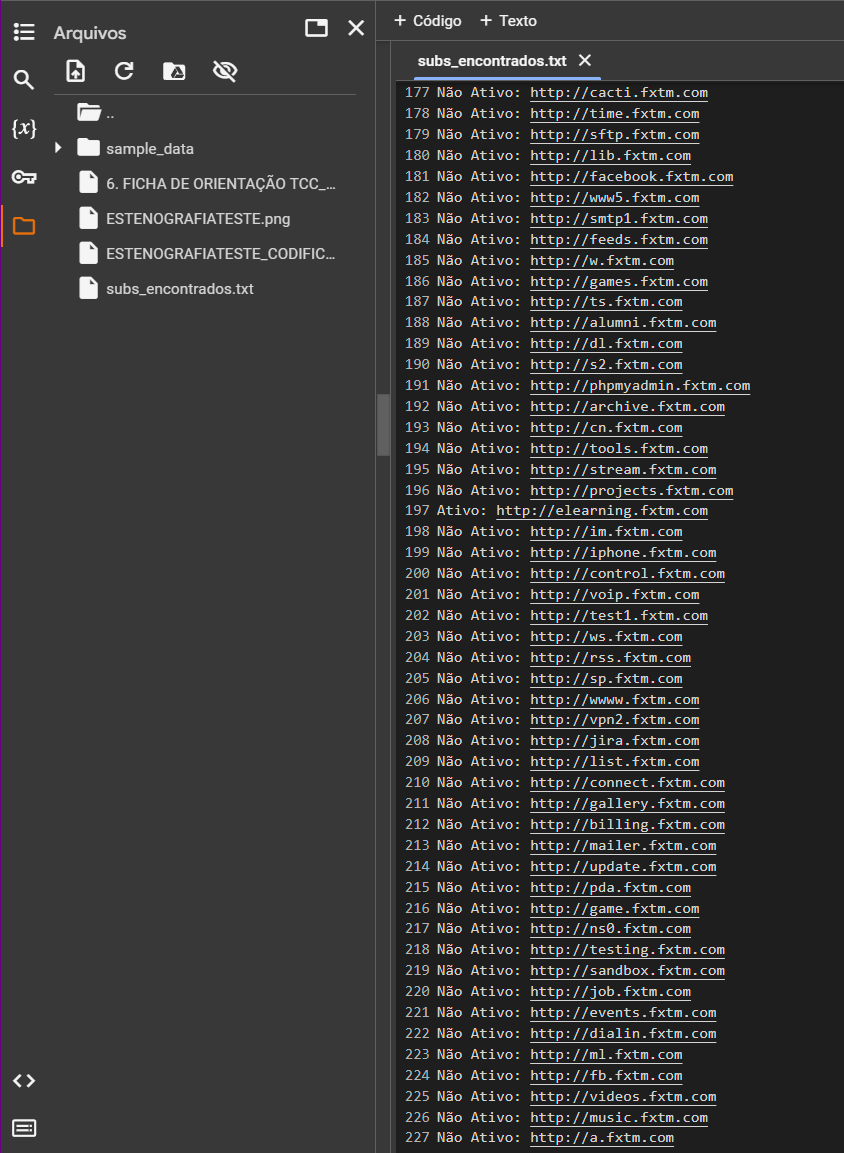

# **ETAPA4**
- Geração de dados fake

---



> As vezes queremos testar um sistema mas ficar inventando dados se torna cansativo e
parecido, logo podemos usar o Python para criar dados falsos que podemos inserir em
um sistema para ver como ele se comporta com dados muitas vezes fora do padrão
esperado.


- Vamos começar fazendo a instalação e importação das bibliotecas

In [18]:
!pip install Faker
from faker import Faker
from faker.providers import internet, profile
import csv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.5 MB/s eta 0:00:00


- Usando a função Fake criamos a função para gerar os dados falsos

In [44]:
def generate_user_data(num_of_users):
  # cria uma instância da função fake
  # assim podemos usar suas funções
  fake = Faker()
  # usado para gerar ip e endereço de internet
  fake.add_provider(internet)
  # inicializa uma lista vazia para armazenar os dados
  user_data = []
  # loop para gerar os dados de x números de usuários
  for _ in range(num_of_users):
  # cria um dicionário vinculado os atributos com as respostas.
    user = {
    'Name': fake.name(),
    'Email': fake.free_email(),
    'Phone Number': fake.phone_number(),
    'Birthdate': fake.date_of_birth(),
    'Address': fake.address(),
    'City': fake.city(),
    'Country': fake.country(),
    'ZIP Code': fake.zipcode(),
    'Job Title': fake.job(),
    'Company': fake.company(),
    'IP Address': fake.ipv4_private(),
    'Credit Card Number': fake.credit_card_number(),
    'Username': fake.user_name(),
    'Website': fake.url(),
    'Biography': fake.text(max_nb_chars=50)
    }
  user_data.append(user)
  return user_data


- Função para mostrar os resultados criados

In [41]:
def print_data_vertically(data):
  for user in data:
    for key, value in user.items():
       print(f"{key}: {value}")
  print()

Chame as funções criadas


In [45]:
quantidadeUsersfake = int(input("[!] Quantidade de usuários que quer gerar os dados: "))
dados_usuario = generate_user_data(quantidadeUsersfake)
print_data_vertically(dados_usuario)


[!] Quantidade de usuários que quer gerar os dados: 10
Name: Sean King
Email: laurataylor@yahoo.com
Phone Number: 3919175309
Birthdate: 1934-10-11
Address: 91238 Herring Turnpike Apt. 523
Hamptonmouth, MT 96444
City: Port Mariastad
Country: Falkland Islands (Malvinas)
ZIP Code: 85608
Job Title: Bonds trader
Company: Wood, Mckinney and Huff
IP Address: 10.246.41.109
Credit Card Number: 3596033646146659
Username: khandennis
Website: https://foster.com/
Biography: Oil change business down. Kind least trade lose.



4) Pesquise a biblioteca Fake e add para a função também gerar uma pequena biografia
do usuário criado. Caso necessário utilize o tradutor para traduzir a página.

R:

```
Biography: Oil change business down. Kind least trade lose.
```




# **ETAPA5**
-  Verificação de metadados


---



> - Metadados são dados de dados, ou seja, dados de um determinado aqui, como quem fez
sua criação, data, quando foi alterado, etc.


- Vamos começar fazendo a instalação e importação das bibliotecas

In [46]:
!pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.9 MB/s eta 0:00:00


In [47]:
import docx # biblioteca para lidar com documentos word
from pprint import pprint # Função pprint pra fazer um print mais bonitinho.

In [48]:
def extract_metadata(docx_file):
    doc = docx.Document(docx_file)  # cria um objeto documento de um arquivo do word.
    core_properties = doc.core_properties  # pega as propriedades do documento.
    metadata = {}  # inicializa uma variável para armazenar os dados do documento

    # faz a extração das propriedades
    for prop in dir(core_properties):  # faz a iteração em todas as propriedades.
        if prop.startswith('__'):  # pula as propriedades que começam com __
            continue
        value = getattr(core_properties, prop)  # pega o valor da propriedade.
        if callable(value):  # pula os métodos do tipo callable
            continue
        if prop == 'created' or prop == 'modified' or prop == 'last_printed':
            if value:
                value = value.strftime('%Y-%m-%d %H:%M:%S')  # converte para formato de string.
            else:
                value = None
        metadata[prop] = value  # salva as propriedades.

    # faz as extrações de propriedades personalizadas, se existir
    try:
        custom_properties = core_properties.custom_properties
        if custom_properties:
            metadata['custom_properties'] = {}
            for prop in custom_properties:
                metadata['custom_properties'][prop.name] = prop.value
    except AttributeError:
        pass  # pula se não estiverem disponíveis

    return metadata


- Chama a função criada.
* Obs: não esqueça de fazer upload de um documento word no Colab


In [50]:
docx_path = '6. FICHA DE ORIENTAÇÃO TCC_UNIFATEC.docx'
metadata = extract_metadata(docx_path)
pprint(metadata)

{'_element': <CT_CoreProperties '<cp:coreProperties>' at 0x7f98ca5ce520>,
 'author': 'DEESG',
 'category': '',
 'comments': '',
 'content_status': '',
 'created': '2018-05-28 12:14:00',
 'identifier': '',
 'keywords': '',
 'language': '',
 'last_modified_by': 'Gihad Abdalla El Khouri',
 'last_printed': '2017-02-07 01:00:00',
 'modified': '2024-03-05 19:34:00',
 'revision': 96,
 'subject': '',
 'title': '',
 'version': ''}


R: METADATA


```
 {'_element': <CT_CoreProperties '<cp:coreProperties>' at 0x7f98ca5ce520>,
 'author': 'DEESG',
 'category': '',
 'comments': '',
 'content_status': '',
 'created': '2018-05-28 12:14:00',
 'identifier': '',
 'keywords': '',
 'language': '',
 'last_modified_by': 'Gihad Abdalla El Khouri',
 'last_printed': '2017-02-07 01:00:00',
 'modified': '2024-03-05 19:34:00',
 'revision': 96,
 'subject': '',
 'title': '',
 'version': ''}
```



# **ETAPA6**
- Estenografia


---



>Estenografia é usado para esconder informações dentro de imagens, e na sua forma mais
complexa pode também esconder outros arquivos (ou vírus) dentro de uma imagem. No
caso do texto ele é convertido para binário e ‘escondido’ dentro da imagem, logo para ler
a mensagem precisamos converter ela novamente para texto


- Vamos começar fazendo a instalação e importação das bibliotecas

In [51]:
!pip3 install opencv-python numpy

In [52]:
import cv2
import numpy as np


- Criamos uma função para converter os dados binário para texto e vice versa

In [53]:
def to_bin(data):
    """Converta o formato dos dados"""
    if isinstance(data, str):
        return ''.join([format(ord(i), "08b") for i in data])
    elif isinstance(data, bytes):
        return ''.join([format(i, "08b") for i in data])
    elif isinstance(data, np.ndarray):
        return [format(i, "08b") for i in data]
    elif isinstance(data, int) or isinstance(data, np.uint8):
        return format(data, "08b")
    else:
        raise TypeError("Tipo não suportado.")


- Crie a função de esconder os dados


In [54]:
def encode(image_name, secret_data):
    # faz a leitura da imagem
    image = cv2.imread(image_name)
    # n. máximo de bits que pode ser 'escondido'
    n_bytes = image.shape[0] * image.shape[1] * 3 // 8
    print("[*] Número máximo de bytes que pode ser escondido:", n_bytes)
    if len(secret_data) > n_bytes:
        raise ValueError("[!] Bytes insuficientes, adicione uma imagem maior ou menos dados.")
    print("[*] Enconding...")
    # add uma condição de parada
    secret_data += "====="
    data_index = 0
    # converte os dados para binário
    binary_secret_data = to_bin(secret_data)
    # tamanho dos dados escondidos
    data_len = len(binary_secret_data)
    for row in image:
        for pixel in row:
            # converte os RGB da imagem para o formato binário
            r, g, b = to_bin(pixel)
            # modifica os bits menos significantes para esconder os dados
            if data_index < data_len:
                # bit de pixel vermelho menos significativo
                pixel[0] = int(r[:-1] + binary_secret_data[data_index], 2)
                data_index += 1
            if data_index < data_len:
                # bit de pixel verde menos significativo
                pixel[1] = int(g[:-1] + binary_secret_data[data_index], 2)
                data_index += 1
            if data_index < data_len:
                # bit de pixel azul menos significativo
                pixel[2] = int(b[:-1] + binary_secret_data[data_index], 2)
                data_index += 1
            # quando os dados forem escondidos encerra o loop
            if data_index >= data_len:
                break
    return image


- Cria a função de descriptografar


In [55]:
def decode(image_name):
    print("[+] Decoding...")
    # le a imagem
    image = cv2.imread(image_name)
    binary_data = ""
    for row in image:
        for pixel in row:
            r, g, b = to_bin(pixel)
            binary_data += r[-1]
            binary_data += g[-1]
            binary_data += b[-1]
            # separa em 8-bits
    all_bytes = [binary_data[i: i + 8] for i in range(0, len(binary_data), 8)]
    # converte os bits para texto
    decoded_data = ""
    for byte in all_bytes:
        decoded_data += chr(int(byte, 2))
        if decoded_data[-5:] == "=====":
            break
    return decoded_data[:-5]

- Chama as funções criadas acima

In [63]:
if __name__ == "__main__":
  input_image = "ESTENOGRAFIATESTE.png"
  output_image = "ESTENOGRAFIATESTE_CODIFICADA.PNG"
  secret_data = "TESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTET TESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTETTESTETESTETESTET"
  # encoding
  encoded_image = encode(image_name=input_image, secret_data=secret_data)
  # salva a imagem com estenografia
  cv2.imwrite(output_image, encoded_image)
  # faz a descriptografia da mensagem super secreta
  decoded_data = decode(output_image)
  print("[+] Mensagem descoberta:", decoded_data)

[*] Número máximo de bytes que pode ser escondido: 39757
[*] Enconding...
[+] Decoding...
[+] Mensagem descoberta: TESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTEESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETTESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETESTETEST

5) Escolha uma imagem e tente esconder o maior texto possível dentro dela, você
percebe alguma diferença na imagem gerada?

R:*Sim a letras da imagem ficaram mais gordinha e fundo preto alem da qualidade reduzida*
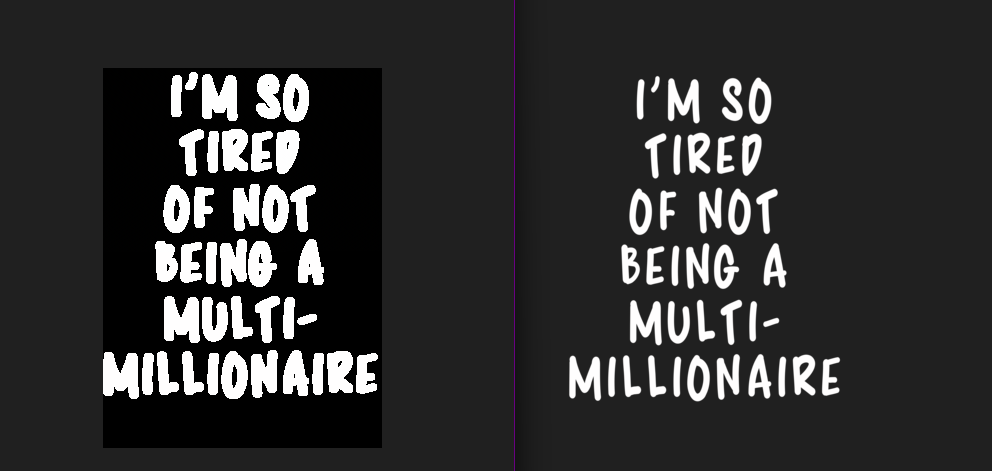